In [38]:
import pandas as pd
import numpy as np

In [39]:
df=pd.read_csv("Iris.csv")

In [40]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [43]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [44]:
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [45]:
df.drop(['Id'],axis=1,inplace=True)

In [46]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
X=df.drop(['Species'],axis=1)
y=df['Species']


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

num_cols = 2
num_rows = (len(numerical_features) + num_cols - 1) // num_cols


fig = make_subplots(rows=num_rows, cols=num_cols)


for i, col in enumerate(numerical_features, start=1):
    row_num = (i - 1) % num_rows + 1
    col_num = (i - 1) // num_rows + 1
    fig.add_trace(
        go.Box(
            x=df[col],
            name=col,
            marker_color='#1f77b4',  # Set box color
            line_color='#1f77b4'     # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(title_text="Boxplots of Numerical Columns", showlegend=False,)

# Show the plot
fig.show()

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

K-Nearest Neighbors Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 1.00
Logistic Regression Accuracy: 1.00


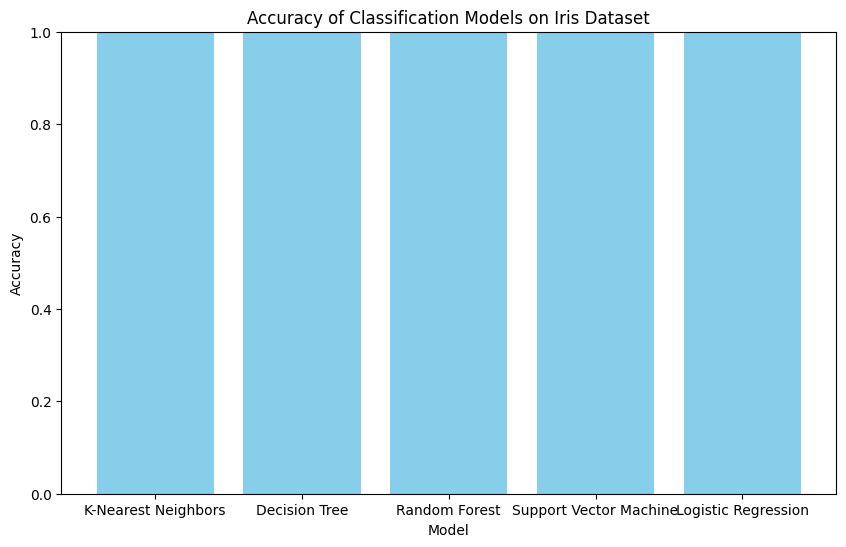

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression()
}


accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models on Iris Dataset')
plt.ylim(0, 1)
plt.show()



In [54]:
!pip install tensorflow

In [55]:
import tensorflow as tf

In [62]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=3)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')



Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 1.6093 - accuracy: 0.1917 - val_loss: 1.5460 - val_accuracy: 0.1000
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.5313 - accuracy: 0.1667 - val_loss: 1.4708 - val_accuracy: 0.1000
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.4558 - accuracy: 0.1750 - val_loss: 1.4007 - val_accuracy: 0.1000
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 1.3859 - accuracy: 0.1750 - val_loss: 1.3326 - val_accuracy: 0.1000
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.3189 - accuracy: 0.2000 - val_loss: 1.2689 - val_accuracy: 0.2000
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2568 - accuracy: 0.2250 - val_loss: 1.2069 - val_accuracy: 0.2000
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1957 - accuracy: 0.2667 - val_loss: 1.1512 - val_accuracy: 0.2333
Epoch 8/100


In [63]:

new_data = scaler.transform([[5.1, 3.5, 1.4, 0.2]])
predictions = model.predict(new_data)
predicted_class = encoder.inverse_transform([tf.argmax(predictions, axis=-1).numpy()])
print(f'Predicted class: {predicted_class[0]}')


1/1 [==============================] - 0s 40ms/step
Predicted class: 0
